<h2><b>Comparing some fundamental regression methods</b></h2>

In this notebook, we will try to predict the "Chance of Admit" data by using some of fundamental regression methods, which are Linear Regression, Multiple Linear Regression, Decision Tree Regression and Random Forest Regression.

<h4><i>Importing the required libraries</i></h4>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h4><i>Preparing the dataset</i><h4>

In [2]:
df=pd.read_csv(r'D:\IBM\Dataset\Dataset.csv')
df = df.iloc[:,1:]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<h4><i>Creating a correlation matrix</i></h4>

In [3]:
corr_matrix = df.corr()
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


We create a correlation matrix to observe the effects of 'Chance of Admit'

Visualizing using a heat map

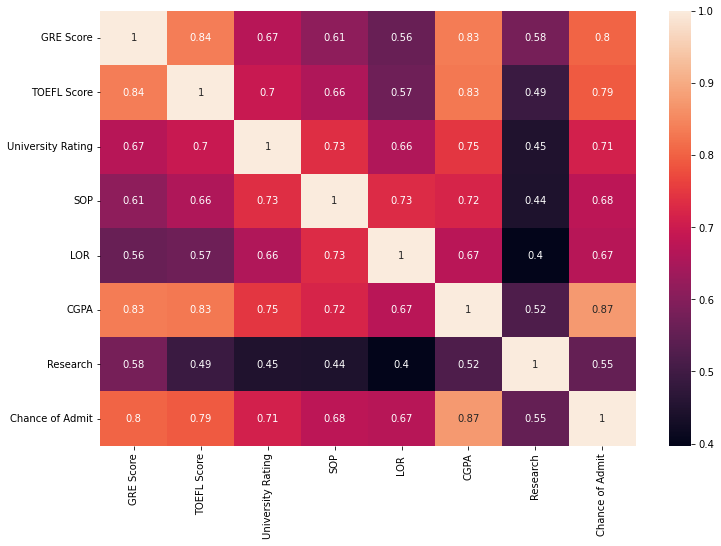

In [4]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

Plotting in relplot to find which has the highest correlation

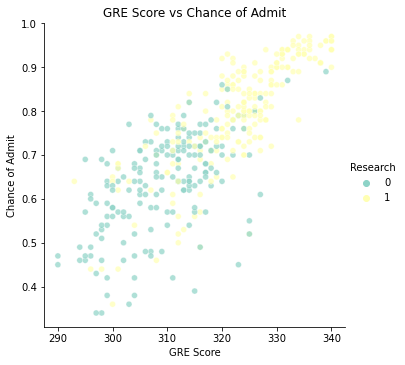

In [9]:
sns.relplot(data=df,x="GRE Score",y="Chance of Admit",hue="Research",palette="Set3",alpha=0.7)
plt.title("GRE Score vs Chance of Admit")
plt.show()

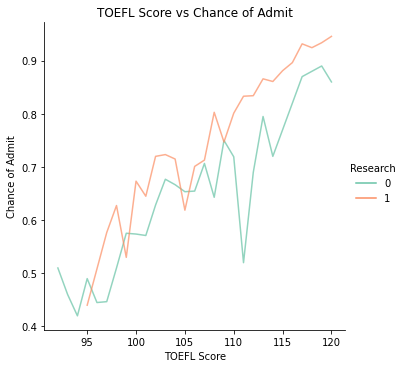

In [13]:
sns.relplot(data=df,x="TOEFL Score",y="Chance of Admit",hue="Research",palette="Set2",alpha=0.7,kind="line",ci=None)
plt.title("TOEFL Score vs Chance of Admit")
plt.show()

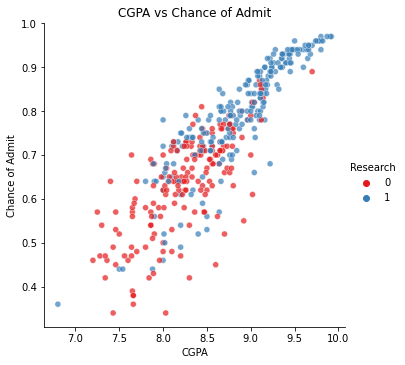

In [14]:
sns.relplot(data=df,x="CGPA",y="Chance of Admit",hue="Research",palette="Set1",alpha=0.7)
plt.title("CGPA vs Chance of Admit")
plt.show()

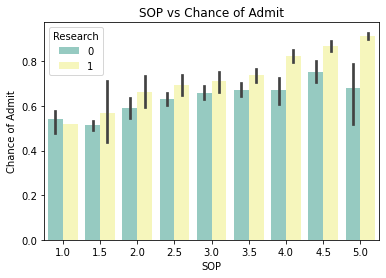

In [15]:
sns.barplot(data=df,x="SOP",y="Chance of Admit",palette="Set3",hue="Research")
plt.title("SOP vs Chance of Admit")
plt.show()

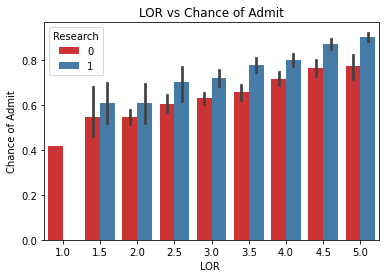

In [16]:
sns.barplot(data=df,x="LOR ",y="Chance of Admit",palette="Set1",hue="Research")
plt.title("LOR vs Chance of Admit")
plt.show()

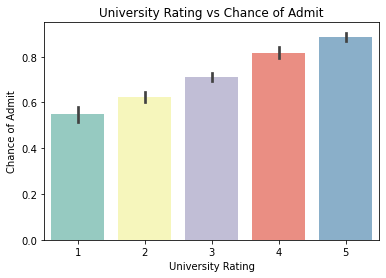

In [17]:
sns.barplot(data=df,x="University Rating",y="Chance of Admit",palette="Set3")
plt.title("University Rating vs Chance of Admit")
plt.show()

As linear relationship between them are observed, linear regression method can be used. The 'Chance of Admit' is depended on more than one data it is more appropriate to apply multiple linear regression than single linear regression

<h4><i>Importing the required libraries for regression analyzes</i></h4>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

<h4><i>Spliting the dataset into training and testing data</i></h4>

In [21]:
x = df[["GRE Score","TOEFL Score","University Rating","SOP",'LOR ',"CGPA"]]
y = df["Chance of Admit"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

<h4><i>Multiple Linear Regression</i></h4>

In [22]:
multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Mutiple Linear Regression's Score = {:.3f}".format(r2_score_mlr))

Mutiple Linear Regression's Score = 0.815


<h4><i>Decision Tree Regression</i></h4>

In [23]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

y_pred_tree = tree_reg.predict(x_test)

r2_score_tree = r2_score(y_test,y_pred_tree)
print("Decision Tree Regression's Score = {:.3f}".format(r2_score_tree))

Decision Tree Regression's Score = 0.587


<h4><i>Random Tree Regression</i></h4>

In [24]:
ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=42)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2_score_rfr))

Random Forest Regression's Score = 0.804


<h4><i>Conclusion</i></h4>

r2_score represents the accuracy of the regression models. As the accuracy of the multiple linear regression is close to 1, it is better than decision tree regression and random tree regression